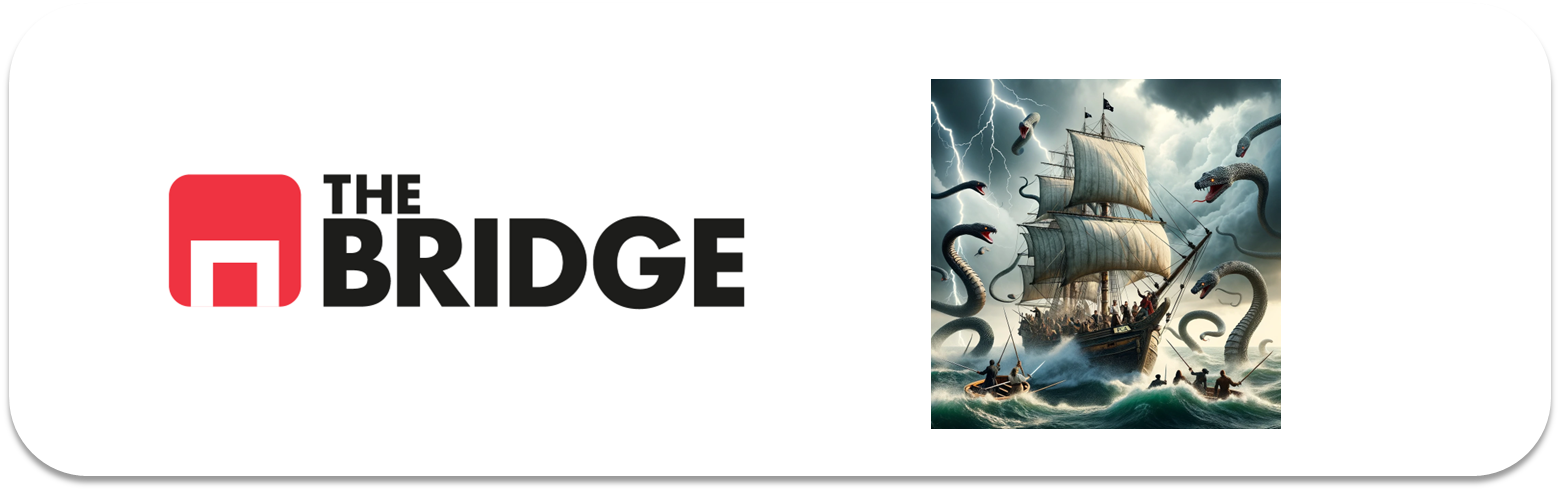

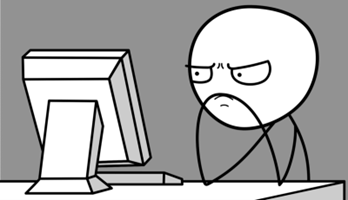

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [114]:
import bootcampviztools as bt
import pandas as pd
import numpy as np
import funciones as fs
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import balanced_accuracy_score

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [115]:
df = pd.read_csv("./data/breastcancer-winsconsin.csv")

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [117]:
fs.describe_df(df).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
id,int64,0.0,569,1.0
diagnosis,object,0.0,2,0.0
radius_mean,float64,0.0,456,0.8
texture_mean,float64,0.0,479,0.84
perimeter_mean,float64,0.0,522,0.92
area_mean,float64,0.0,539,0.95
smoothness_mean,float64,0.0,474,0.83
compactness_mean,float64,0.0,537,0.94
concavity_mean,float64,0.0,537,0.94


In [118]:
fs.clasifica_variables(df,2,0.10)

,nombre_variable,tipo_sugerido
0,id,Numérica Continua
1,diagnosis,Binaria
2,radius_mean,Numérica Continua
3,texture_mean,Numérica Continua
4,perimeter_mean,Numérica Continua
5,area_mean,Numérica Continua
6,smoothness_mean,Numérica Continua
7,compactness_mean,Numérica Continua
8,concavity_mean,Numérica Continua
9,concave points_mean,Numérica Continua


In [119]:
df.id.value_counts()

id
842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: count, Length: 569, dtype: int64

In [120]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [121]:
df["Unnamed: 32"].value_counts(dropna=False)

Unnamed: 32
NaN    569
Name: count, dtype: int64

| Variable            | Descripción                                               |
|---------------------|-----------------------------------------------------------|
| id                  | Identificador del paciente                                |
| diagnosis           | Diagnóstico (M = Maligno, B = Benigno)                    |
| radius_mean         | Media del radio del núcleo celular                        |
| texture_mean        | Media de la textura del núcleo celular                    |
| perimeter_mean      | Media del perímetro del núcleo celular                    |
| area_mean           | Media del área del núcleo celular                         |
| smoothness_mean     | Media de la suavidad                                      |
| compactness_mean    | Media de la compacidad                                    |
| concavity_mean      | Media de la concavidad                                    |
| concave points_mean | Media de los puntos cóncavos                              |
| radius_se           | Error estándar del radio del núcleo celular,     Estas medidas ayudan a entender la variabilidad y precisión de las características calculadas para cada muestra de células. Si el error estándar es pequeño, significa que la media es una estimación precisa de la característica para la población total de células.           |
| texture_se          | Error estándar de la textura del núcleo celular           |
| perimeter_se        | Error estándar del perímetro del núcleo celular           |
| area_se             | Error estándar del área del núcleo celular                |
| smoothness_se       | Error estándar de la suavidad                             |
| compactness_se      | Error estándar de la compacidad                           |
| concavity_se        | Error estándar de la concavidad                           |
| concave points_se   | Error estándar de los puntos cóncavos                     |
| symmetry_se         | Error estándar de la simetría                             |
| fractal_dimension_se| Error estándar de la dimensión fractal                    |
| texture_worst       | Mayor valor de la textura                                 |
| perimeter_worst     | Mayor valor del perímetro                                 |
| area_worst          | Mayor valor del área                                      |
| smoothness_worst    | Mayor valor de la suavidad                                |
| compactness_worst   | Mayor valor de la compacidad                              |
| concavity_worst     | Mayor valor de la concavidad                              |
| concave points_worst| Mayor valor de los puntos cóncavos                        |



### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [122]:
df = df.drop(columns=["Unnamed: 32"])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [123]:
# Definir el orden de las categorías
orden_categorías = {'B': 0, 'M': 1}

# Convertir la columna categórica a numérica continua
df["diagnosis"] = df['diagnosis'].map(orden_categorías)

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [124]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

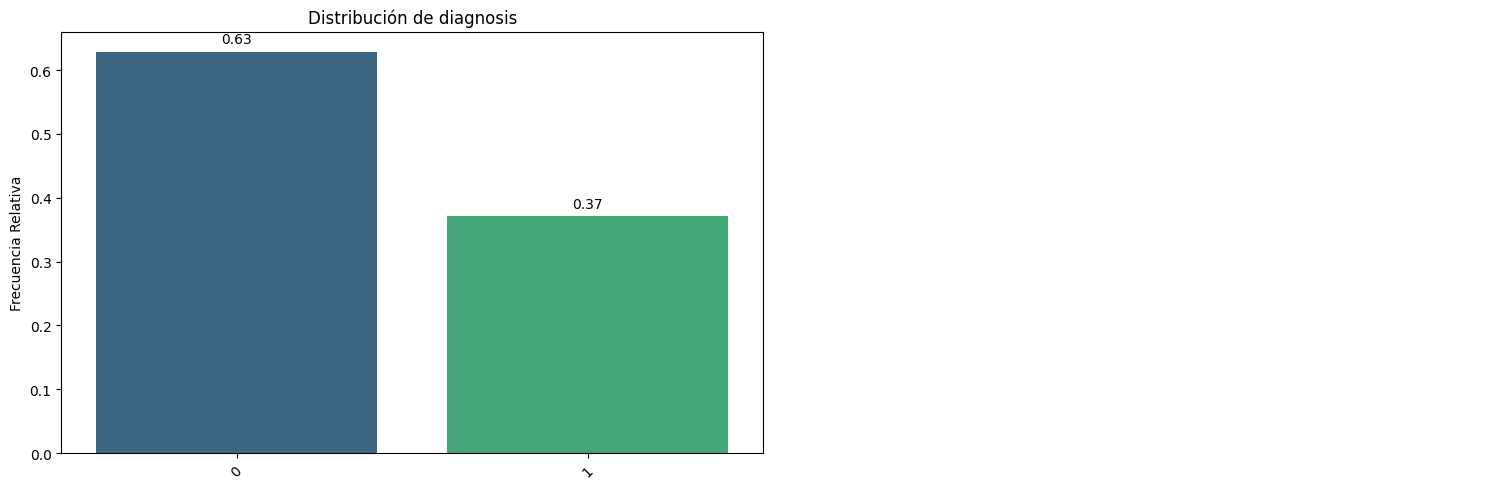

In [125]:
bt.pinta_distribucion_categoricas(train_set, ["diagnosis"], mostrar_valores=True, relativa=True)

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

In [126]:
target = "diagnosis"
features = list(df.columns)
features.remove("diagnosis")
features.remove("id")
features_1 = features
features_1

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [127]:
features_2 = [feature for feature in features if feature not in ["radius_mean", "perimeter_mean", "radius_se", "perimeter_se", "radius_worst", "perimeter_worst"]]

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

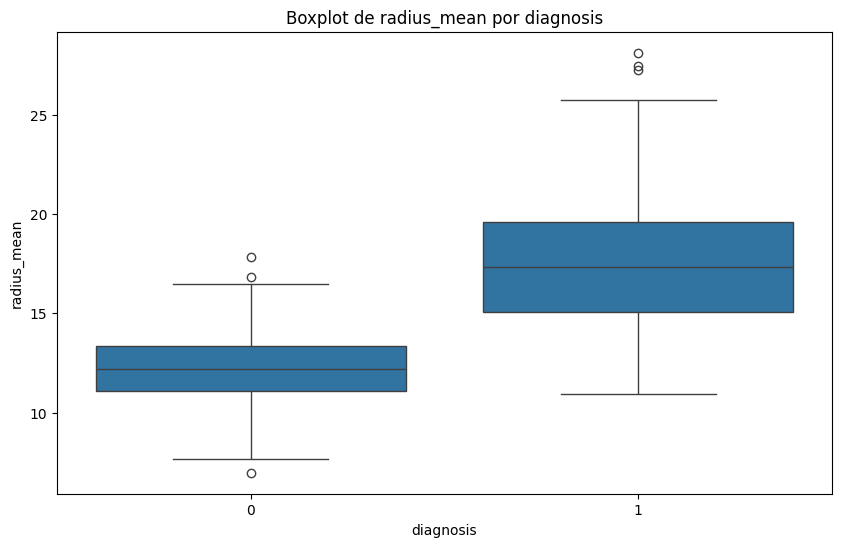

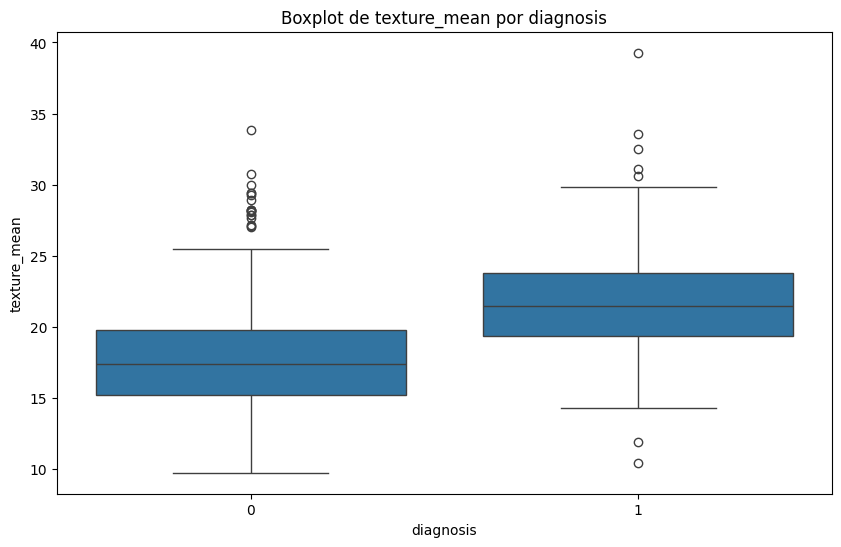

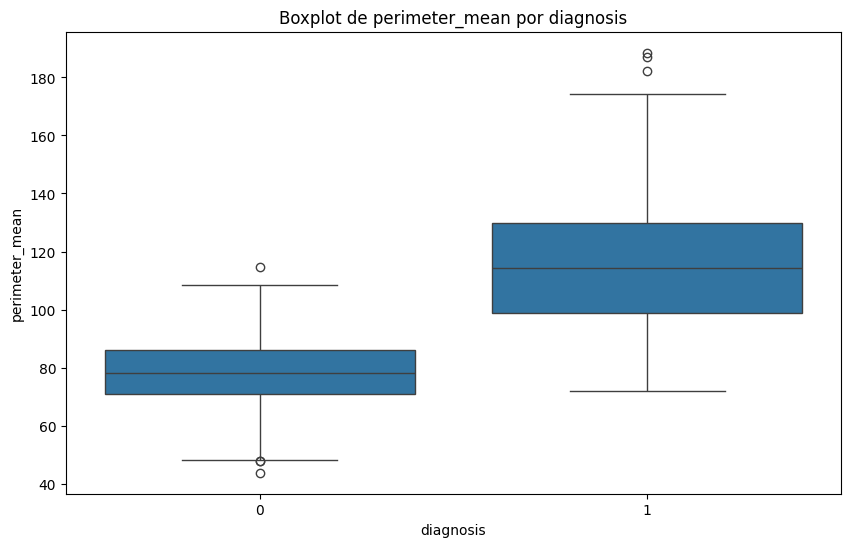

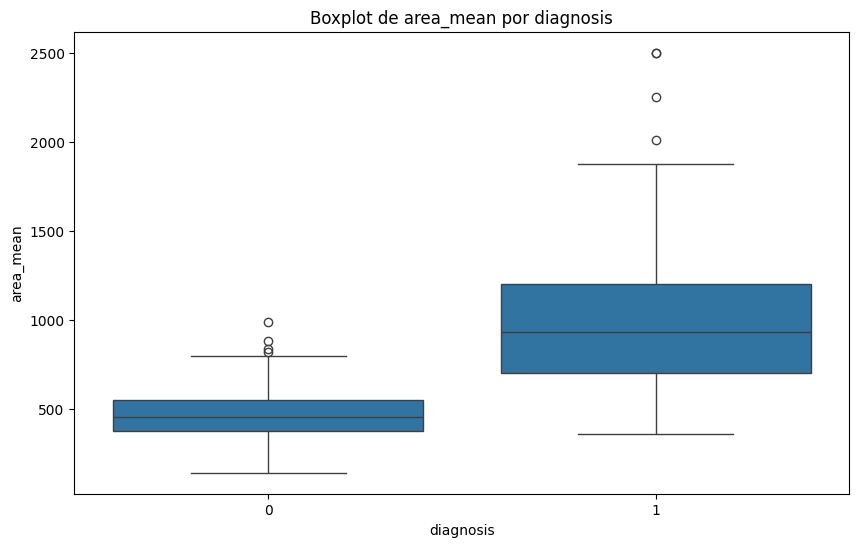

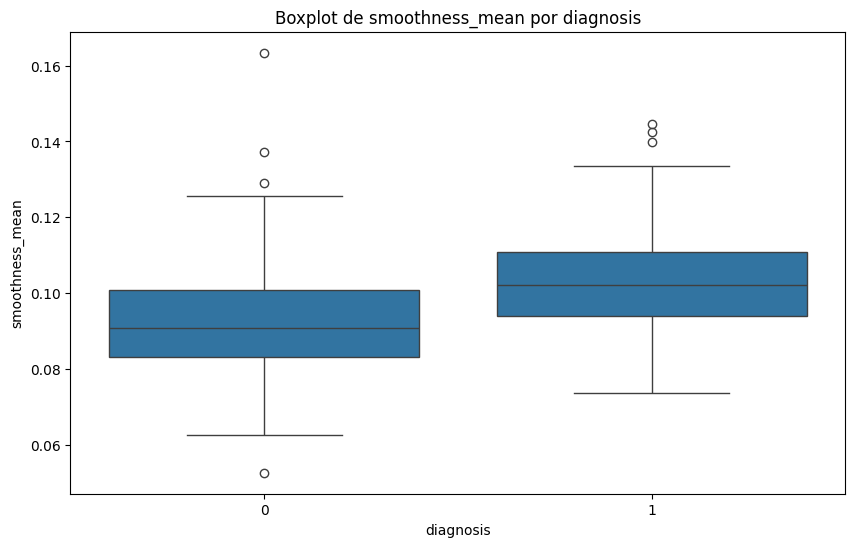

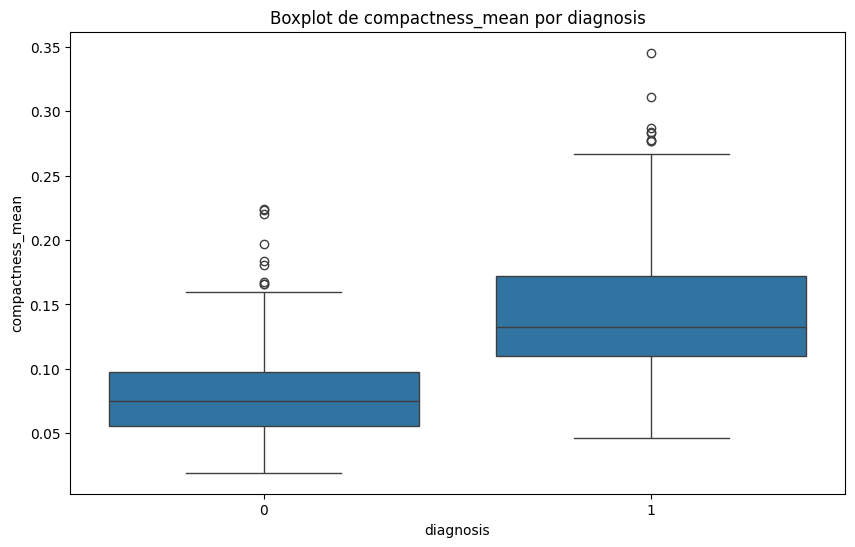

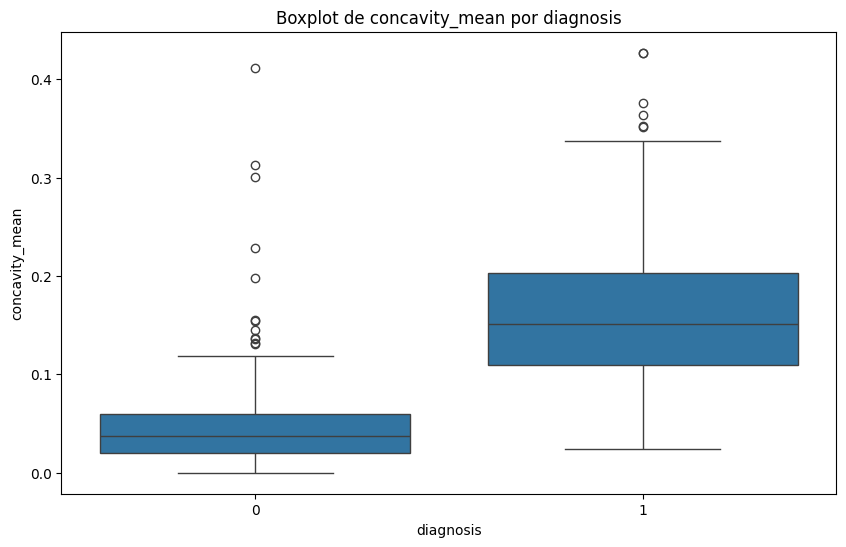

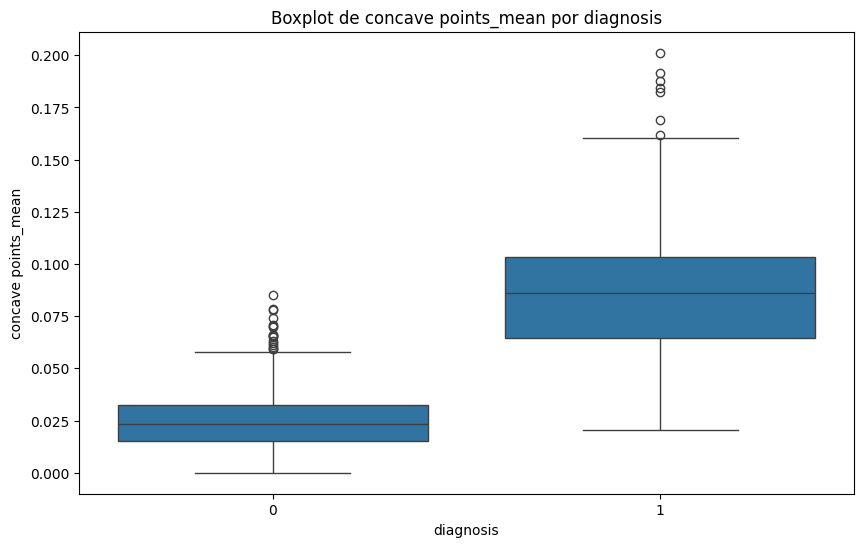

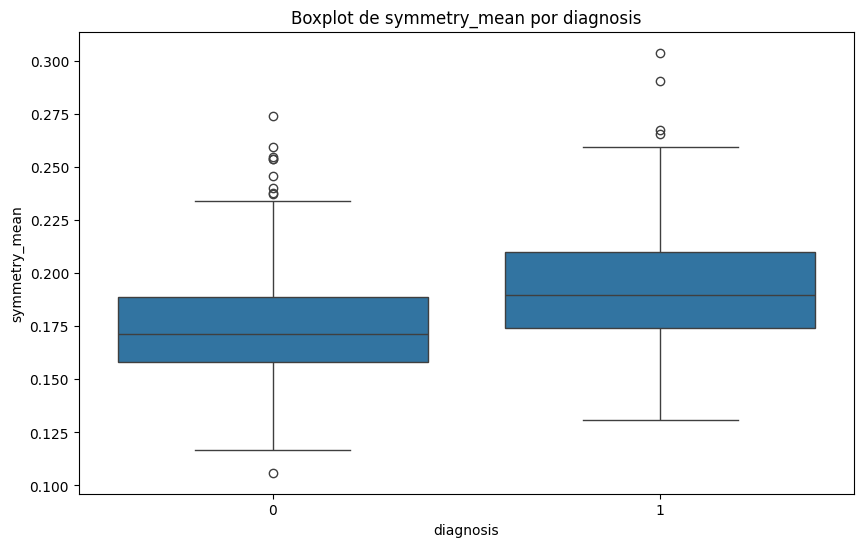

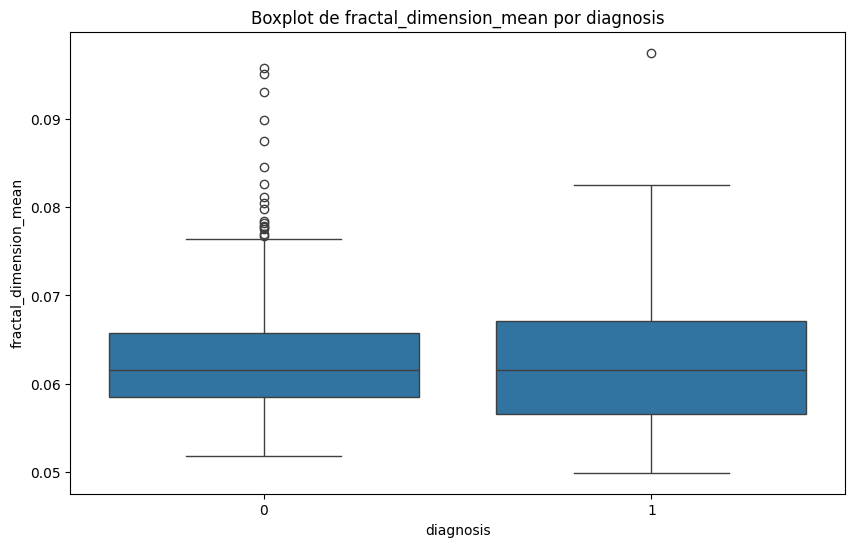

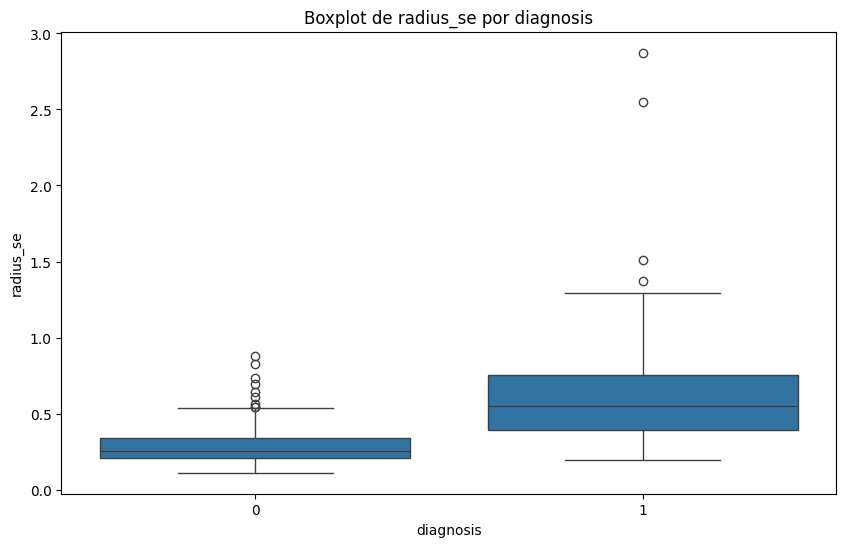

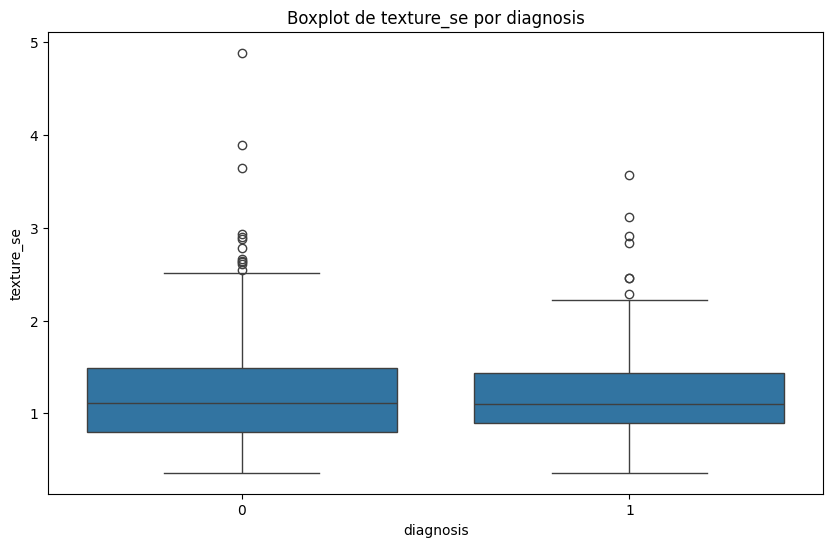

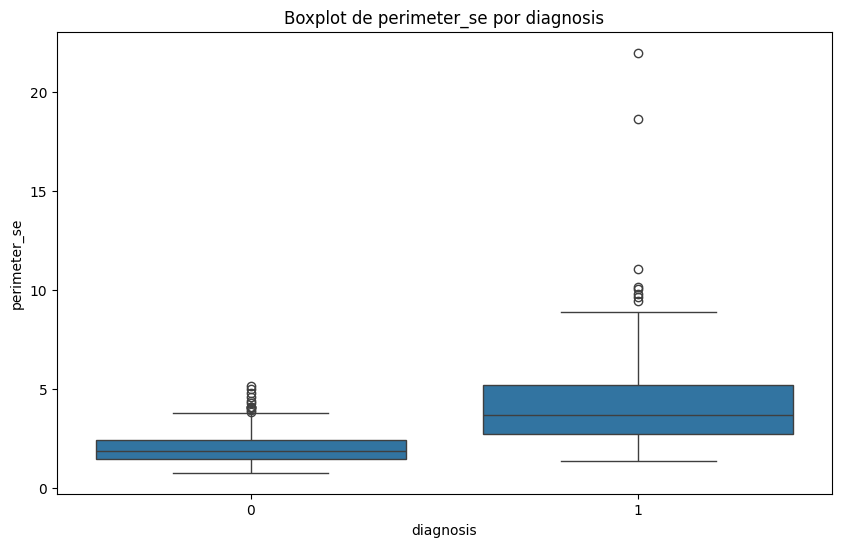

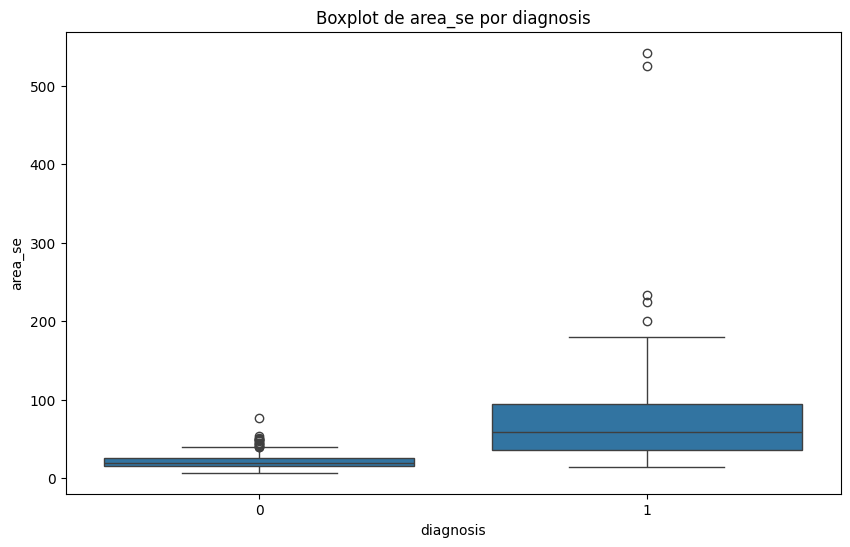

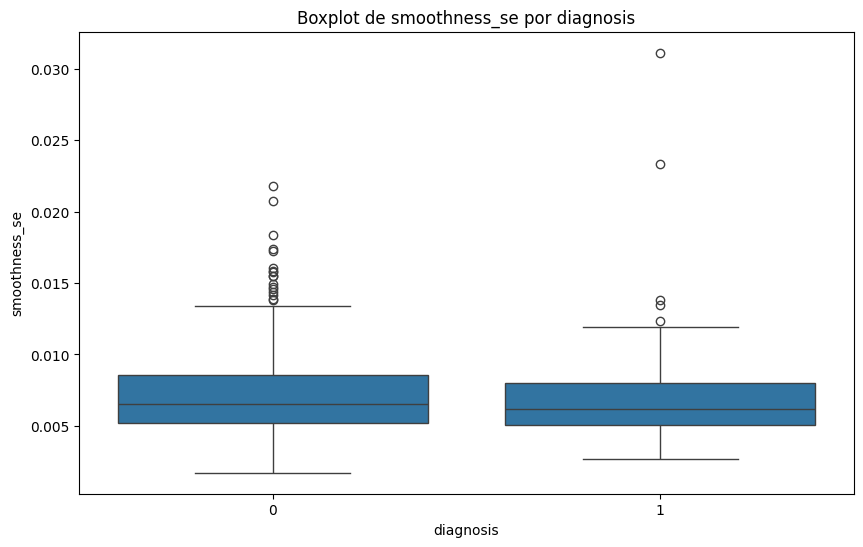

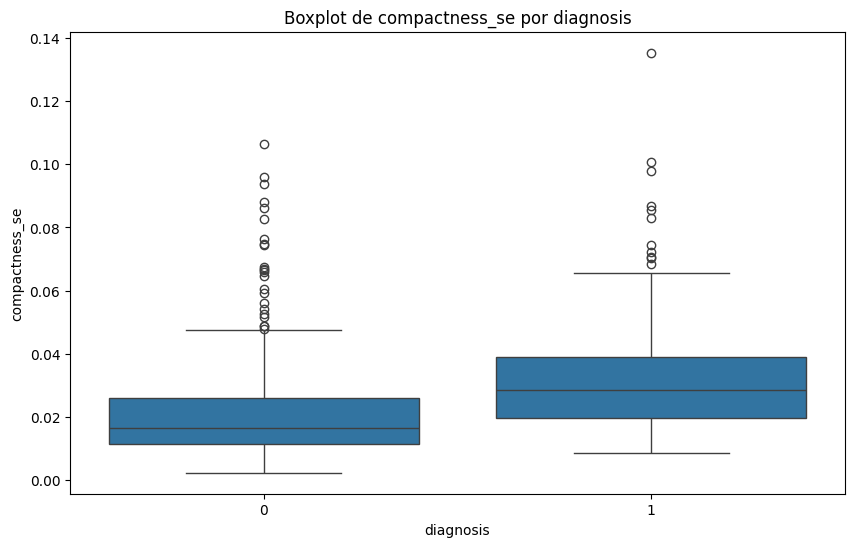

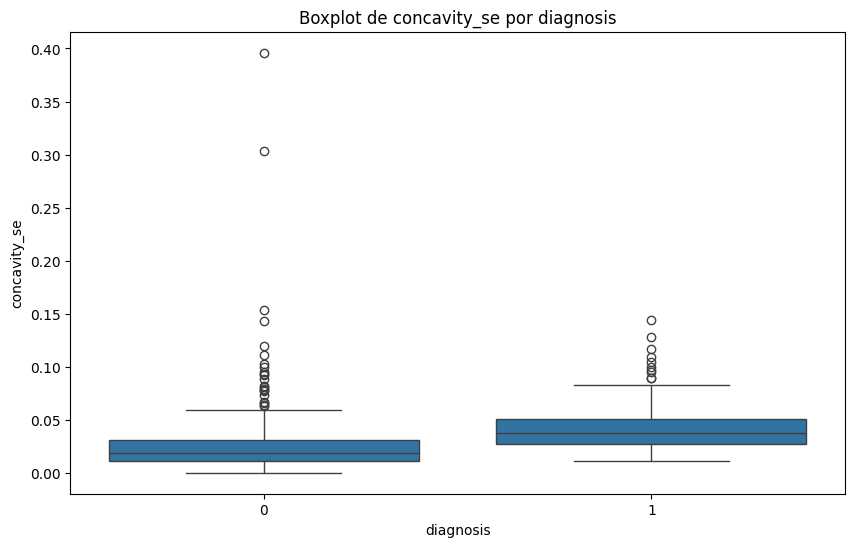

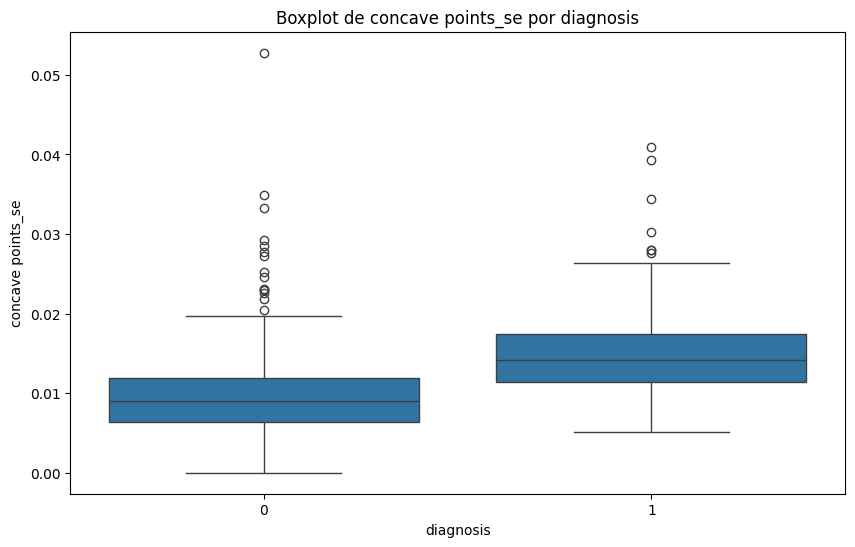

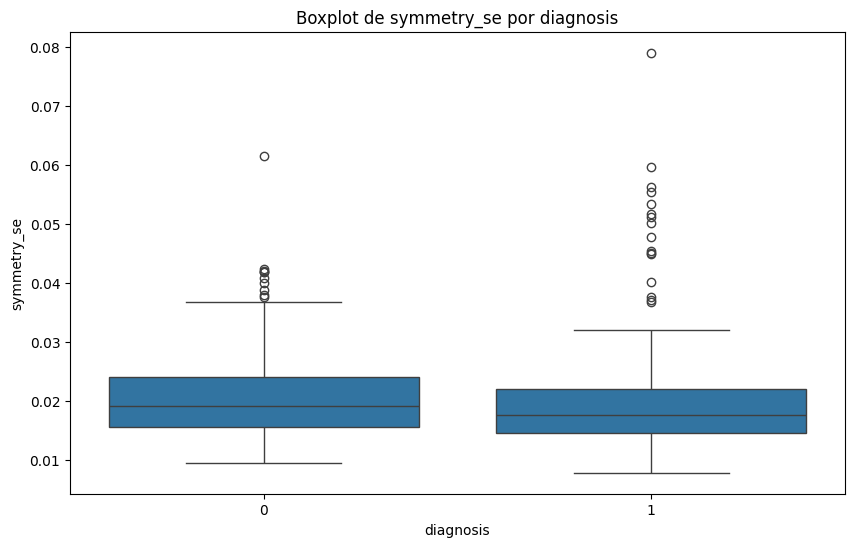

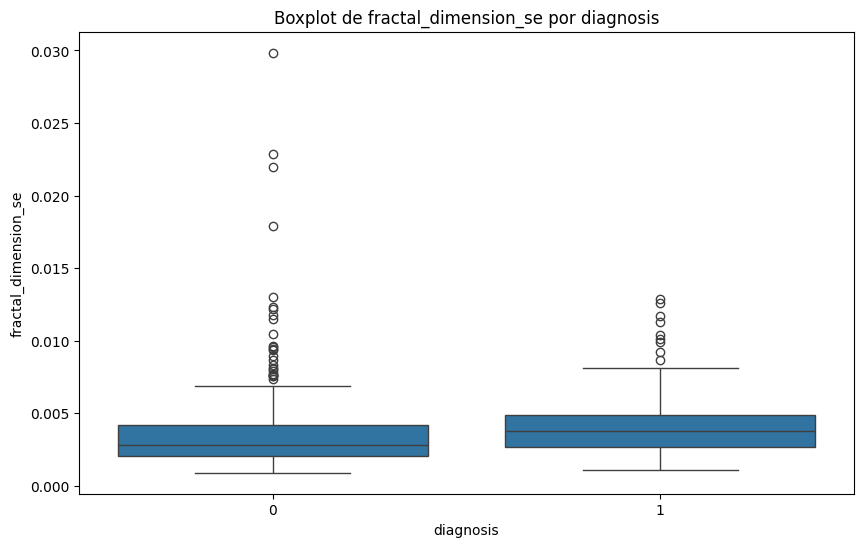

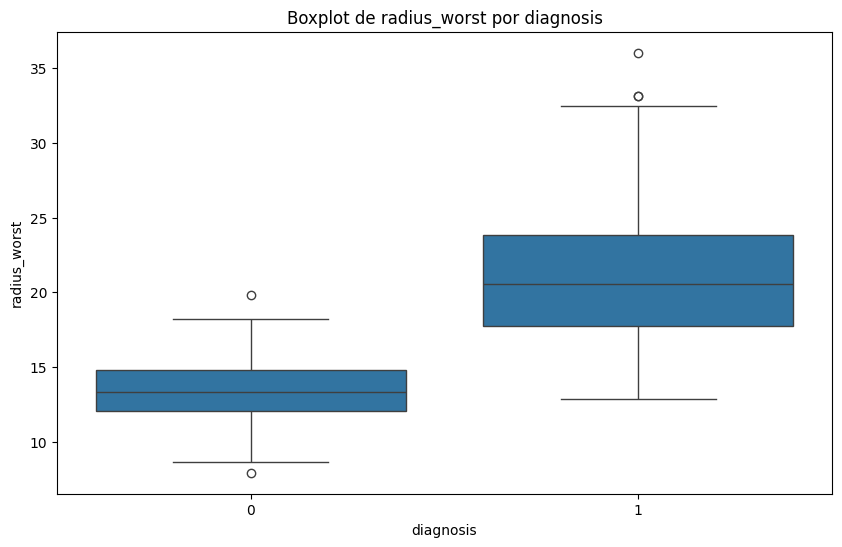

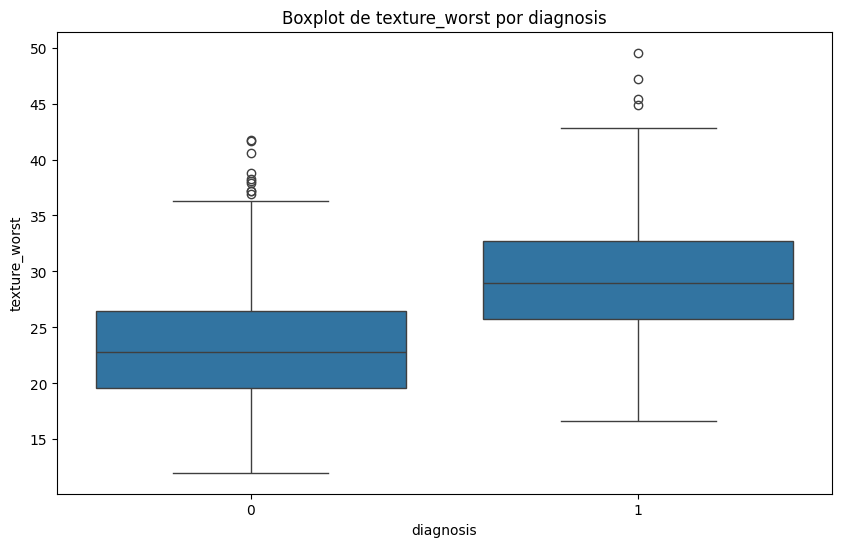

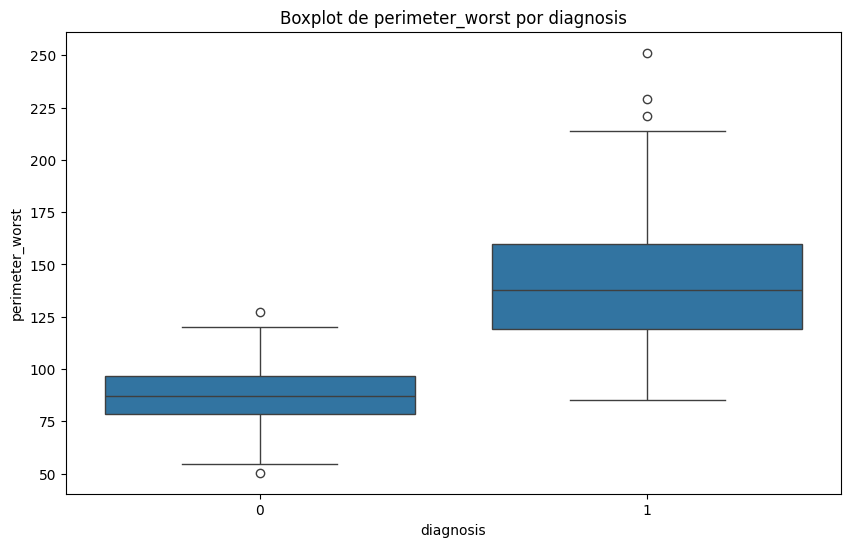

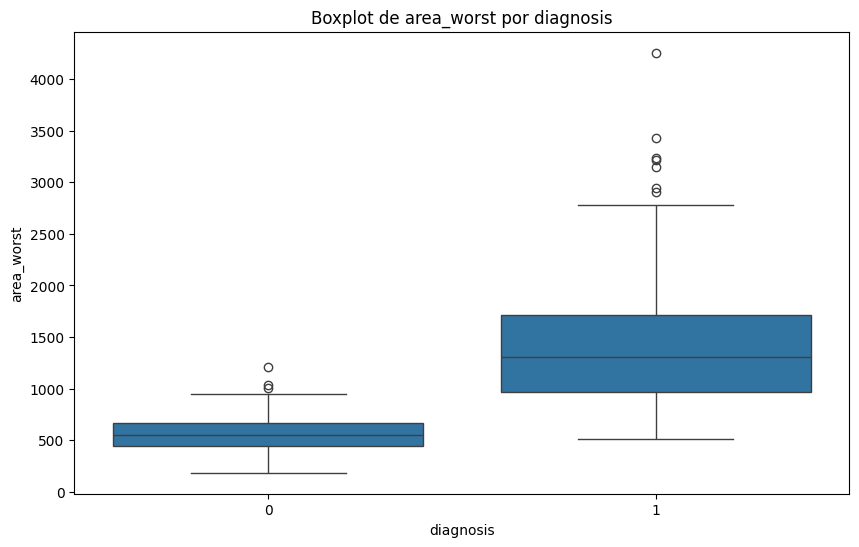

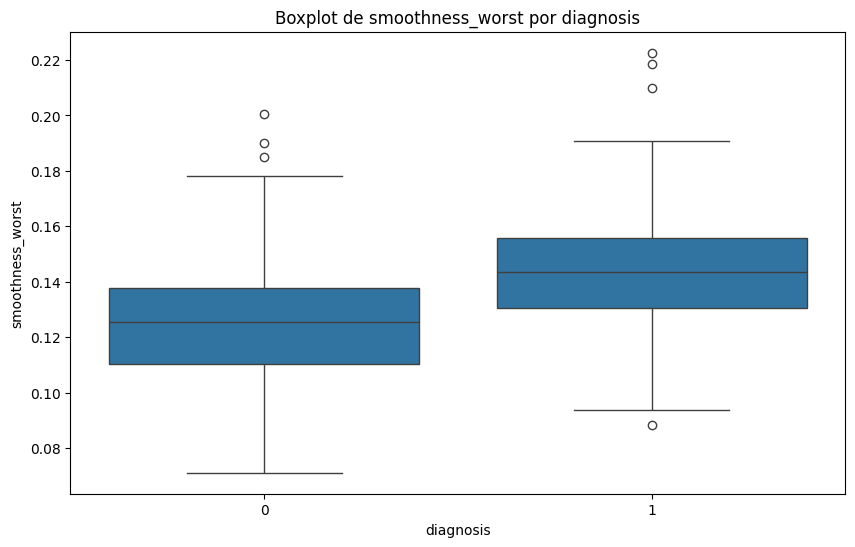

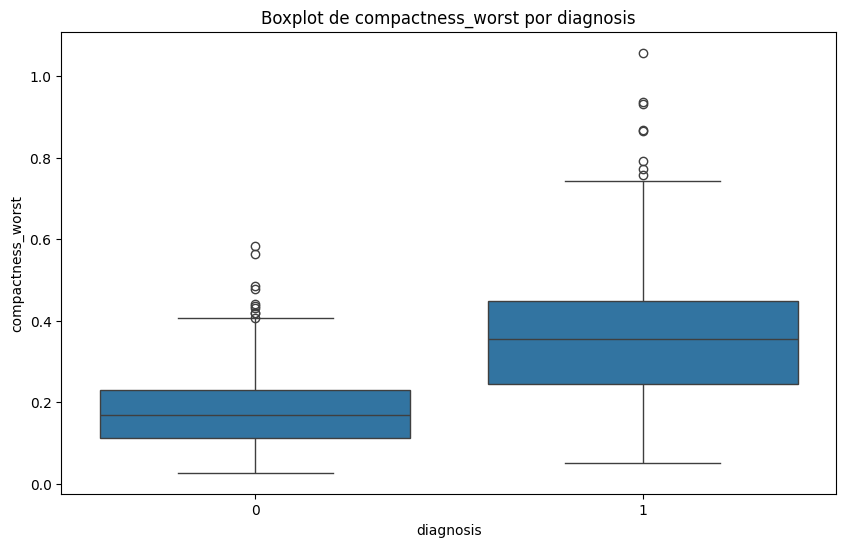

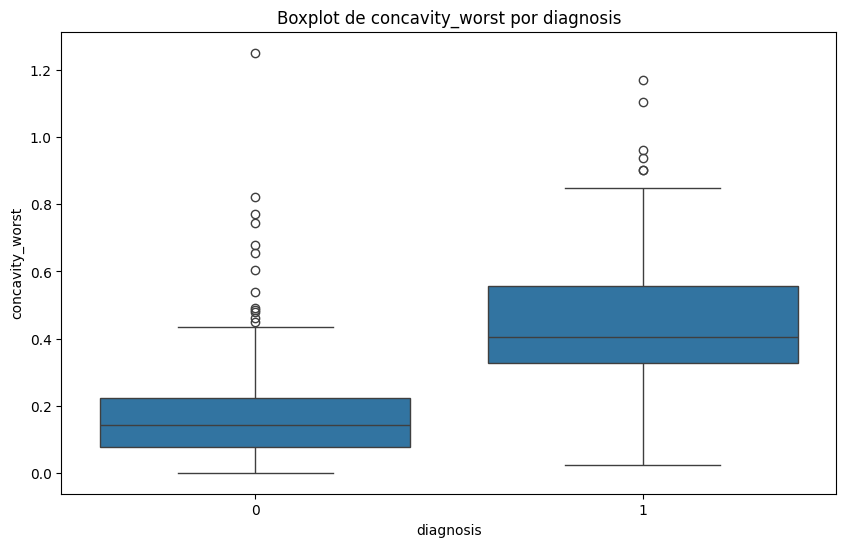

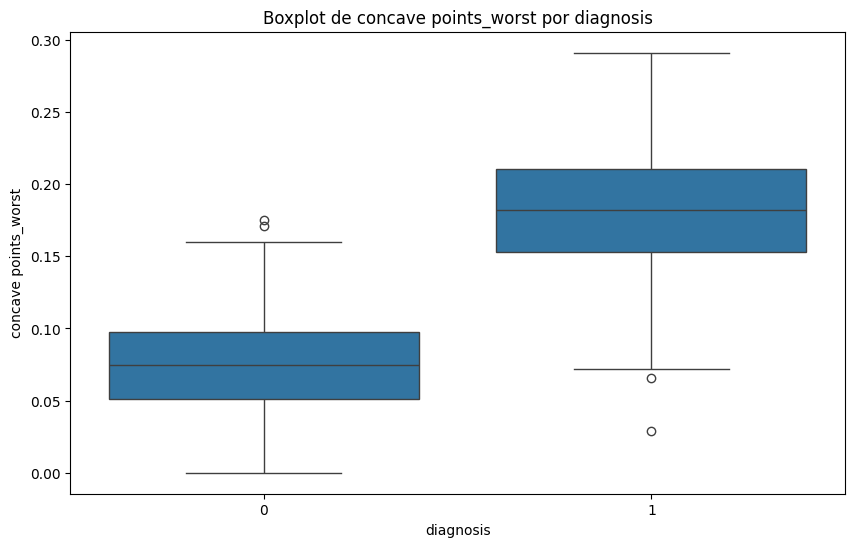

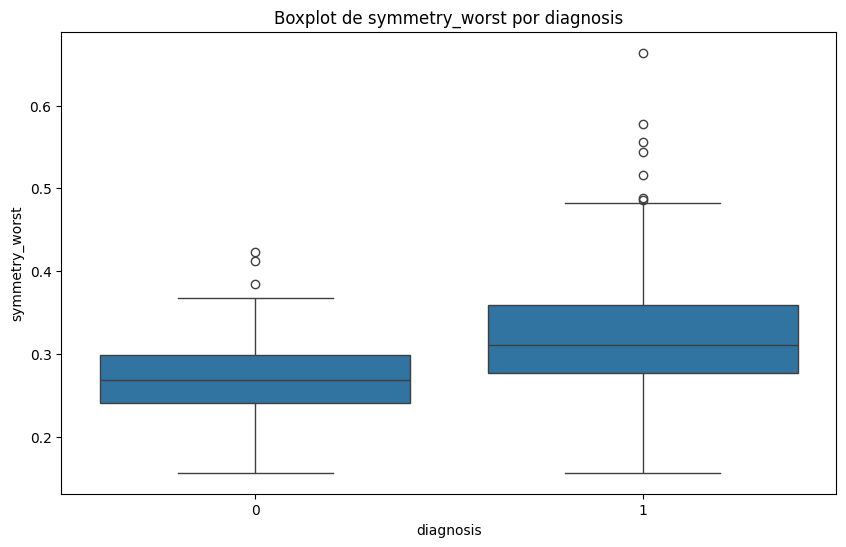

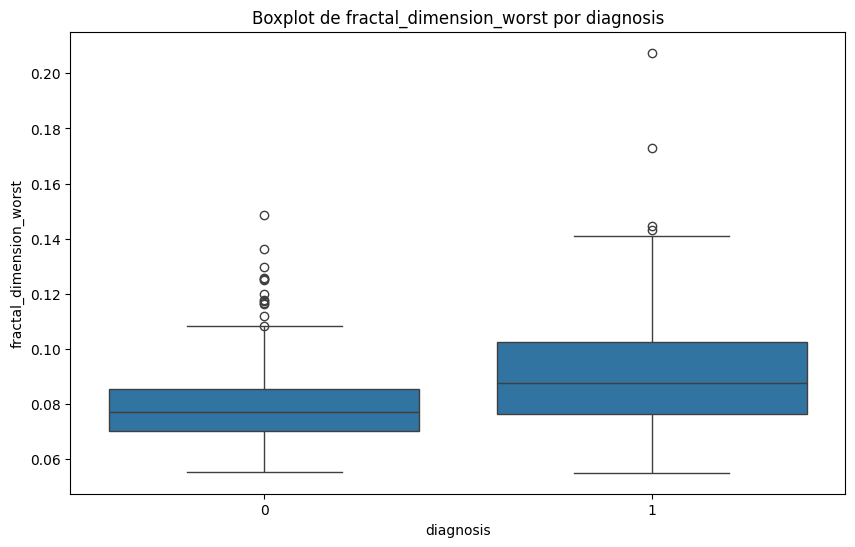

In [128]:
# Crear un boxplot para cada característica numérica
for feature in features_1:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Boxplot de {feature} por {target}')
    plt.show()

<Axes: >

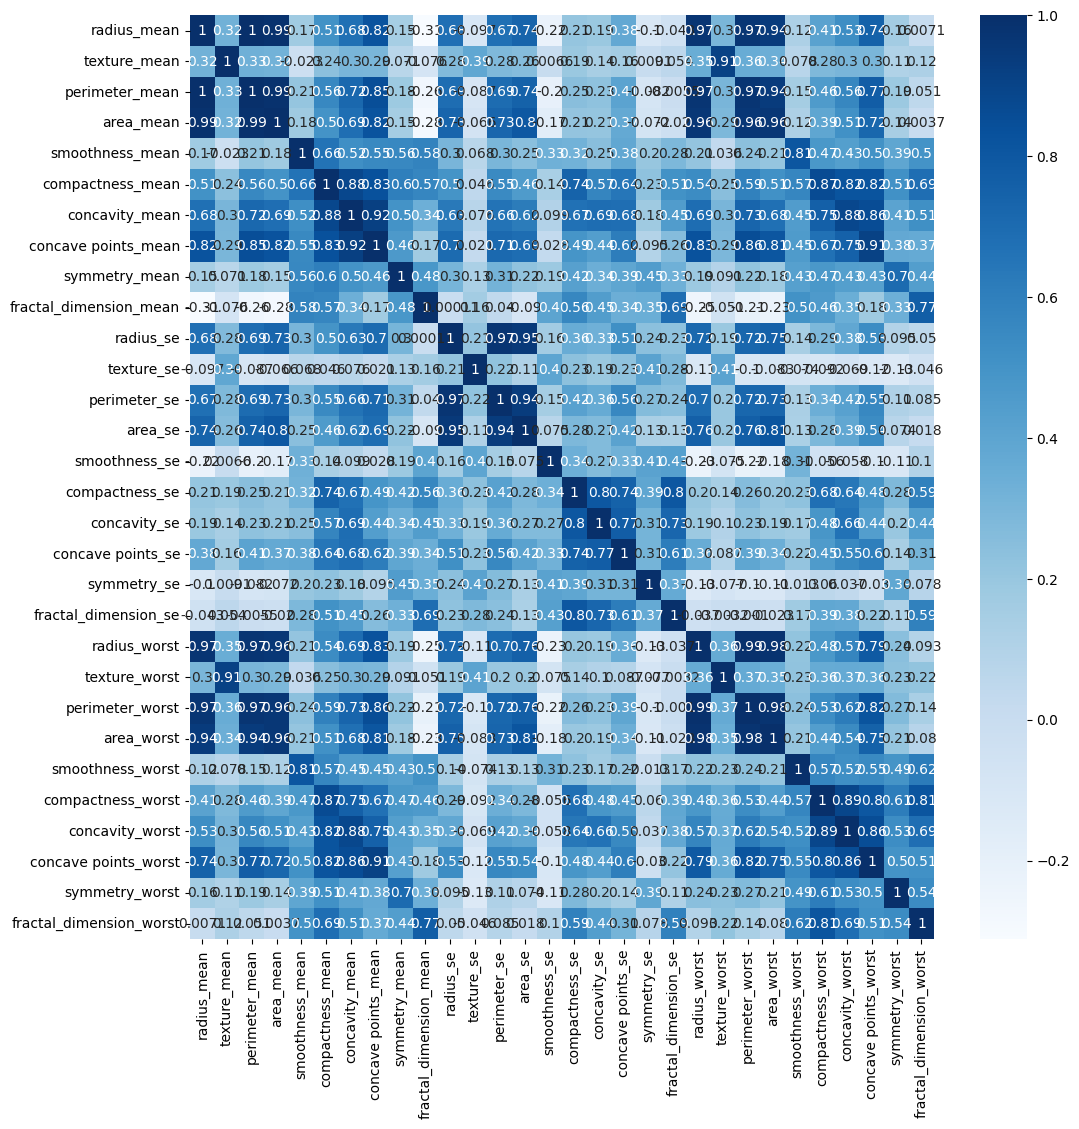

In [129]:
corr= df[features_1].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr[features_1], annot=True, cmap="Blues")

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [130]:
from sklearn.ensemble import RandomForestClassifier 

X_train = train_set[features_1]
y_train = train_set[target]
X_test = test_set[features_1]
y_test = test_set[target]

# Crear el modelo de RandomForestClassifier con max_depth=5
modelo = RandomForestClassifier(max_depth=5, random_state=42)

# Entrenar el modelo con validación cruzada y guardar la métrica de balanced_accuracy
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar el modelo final en los datos de entrenamiento completos
modelo.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
y_pred = modelo.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Guardar la métrica en una variable
baseline_performance = balanced_accuracy

print(f'Métricas de validación cruzada (balanced_accuracy): {scores}')
print(f'Métrica de balanced_accuracy en test: {baseline_performance}')

Métricas de validación cruzada (balanced_accuracy): [0.95454545 0.93240454 0.98245614 0.95304438 0.94711042]
Métrica de balanced_accuracy en test: 0.9580740255486406


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

<Axes: >

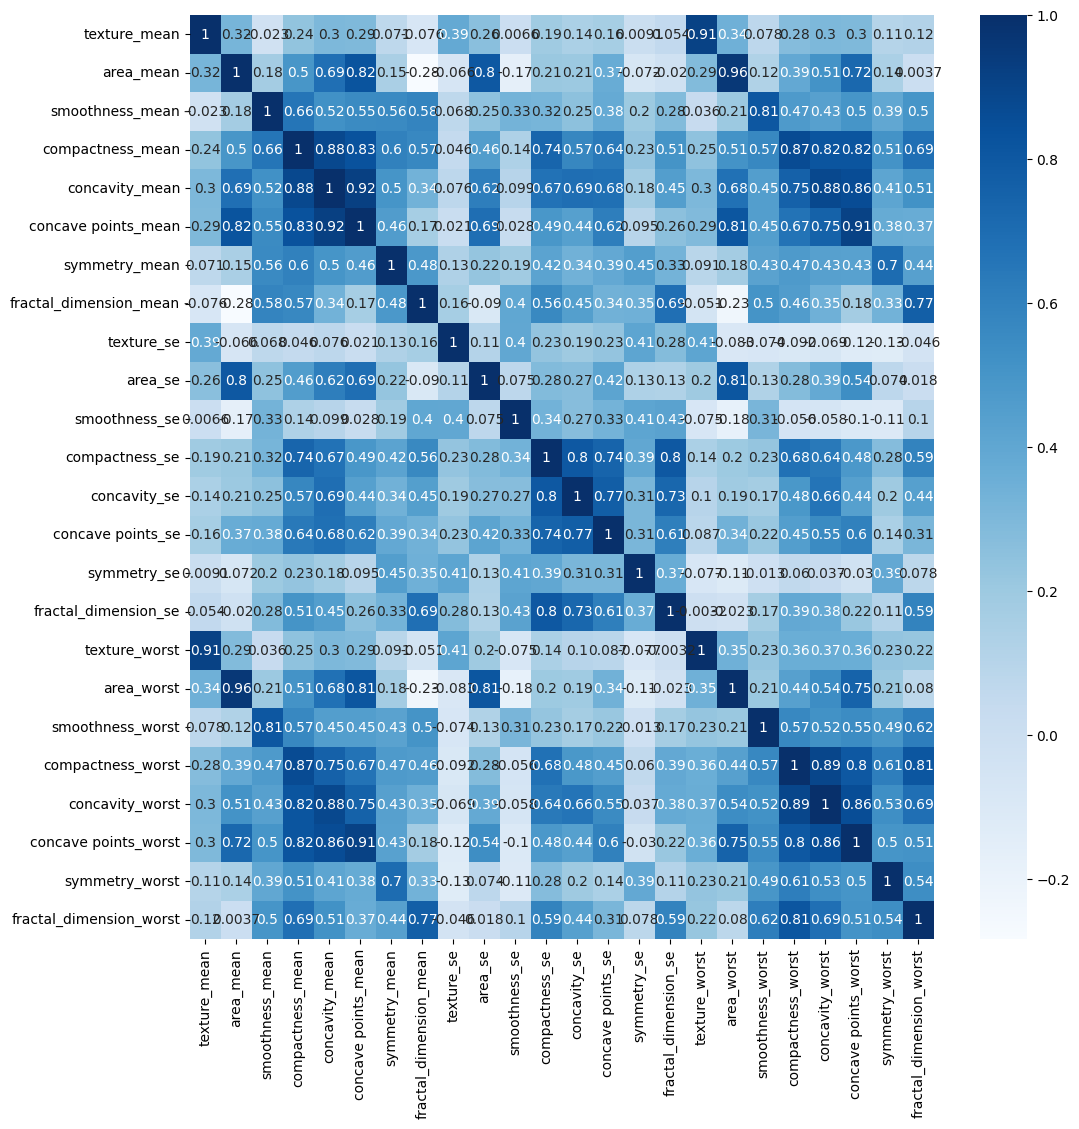

In [131]:
corr= df[features_2].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr[features_2], annot=True, cmap="Blues")

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [132]:
X_train = train_set[features_2]
y_train = train_set[target]
X_test = test_set[features_2]
y_test = test_set[target]

# Crear el modelo de RandomForestClassifier con max_depth=5
modelo = RandomForestClassifier(max_depth=5, random_state=42)

# Entrenar el modelo con validación cruzada y guardar la métrica de balanced_accuracy
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar el modelo final en los datos de entrenamiento completos
modelo.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
y_pred = modelo.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Guardar la métrica en una variable
baseline_performance = balanced_accuracy

print(f'Métricas de validación cruzada (balanced_accuracy): {scores}')
print(f'Métrica de balanced_accuracy en test: {baseline_performance}')

Métricas de validación cruzada (balanced_accuracy): [0.95454545 0.91769866 0.99122807 0.98529412 0.94117647]
Métrica de balanced_accuracy en test: 0.9510317720275139


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [133]:
from sklearn.feature_selection import SelectKBest, f_classif

'''
f_classif realiza un test ANOVA
a técnica de análisis de varianza (ANOVA) también conocida como análisis factorial 
y desarrollada por Fisher en 1930,constituye la herramienta básica para el estudio 
del efecto de uno o más factores (cada uno con dos o más niveles) sobre la media de 
una variable continua. Es por lo tanto el test estadístico a emplear cuando se 
desea comparar las medias de dos o más grupos.
'''
#features_num.remove("quality")
X_train = df[features_1]
y_train = df[target]
selector = SelectKBest(f_classif)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, 
                             columns = selector.get_feature_names_out())
X_train_kbest.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625


In [134]:
# Crear el modelo de RandomForestClassifier con max_depth=5
modelo = RandomForestClassifier(max_depth=5, random_state=42)

# Entrenar el modelo con validación cruzada y guardar la métrica de balanced_accuracy
scores = cross_val_score(modelo, X_train_kbest, y_train, cv=5, scoring='balanced_accuracy')

# Entrenar el modelo final en los datos de entrenamiento completos
modelo.fit(X_train_kbest, y_train)

# Evaluar el modelo en los datos de prueba
X_test_kbest = pd.DataFrame(X_test, 
                             columns = selector.get_feature_names_out())

y_pred = modelo.predict(X_test_kbest)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Guardar la métrica en una variable
baseline_performance = balanced_accuracy

print(f'Métricas de validación cruzada (balanced_accuracy): {scores}')
print(f'Métrica de balanced_accuracy en test: {baseline_performance}')

Métricas de validación cruzada (balanced_accuracy): [0.9041926  0.90452014 0.98809524 0.95039683 0.96210597]
Métrica de balanced_accuracy en test: 0.9348182115951523


### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [142]:
from sklearn.feature_selection import RFE

X_train_10 = df[features_2].copy()
y_train_10 = df["diagnosis"]


In [143]:
rf_RFE = RandomForestClassifier(random_state= 42) 
# Puedes usar tu modelo, o modelos a probar o un modelo "proxy" como en la selección por modelo

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train_10, y_train_10)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features_2).sort_values("ranking")

[ 6  1 18  7  1  1 20 13 19  2 15 12  8 16 17 11  4  1  9  5  3  1 10 14]


,ranking
area_mean,1
concave points_worst,1
concavity_mean,1
concave points_mean,1
area_worst,1
area_se,2
concavity_worst,3
texture_worst,4
compactness_worst,5
texture_mean,6


### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr_selector = LogisticRegression(max_iter = 1000)
rf_selector = RandomForestClassifier(random_state= 42)

rf_selector.fit(df[features_1],df["diagnosis"])

RandomForestClassifier(random_state=42)

In [136]:
rf_selector.feature_importances_[rf_selector.feature_importances_ > 
rf_selector.feature_importances_.mean()]

array([0.03484323, 0.06799034, 0.06046164, 0.06691736, 0.10704566,
       0.08284828, 0.0808497 , 0.13935694, 0.03733871, 0.13222509])

In [137]:
from sklearn.feature_selection import SelectFromModel

selector_model_median = SelectFromModel(estimator = rf_selector, threshold= "median") 
# El modelo debe tener un atributo feature_importances_ o un atributo coef_

selector_model_median.fit(df[features_1],df["diagnosis"])

selector_model_median.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype=object)

### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.